#第四章まとめ

###機械学習
機械学習では、**訓練データ**と**テストデータ**の2つのデータに分けて学習を行う。また、その時に用いるデータセットは複数のものを使用しないと正しい評価が行えない。この状態を**過学習**という。

#損失関数
機械学習において物事を数値的に判断する指標であり、ニューラルネットワークの悪さを表すものである。

主に以下二つが用いられる。


##2乗和誤差

損失関数のうち最も有名なもの。
数式では$$ E = \frac{1}{2}\sum_{k}(y_{k} - t_{k})^2 $$

####実装演習

(以下の変数ｔのように正解ラベルを１、それ以外を０とする表記方法を**one-hot表現**という。)

In [ ]:
import numpy as np

In [ ]:
def sum_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [ ]:
# 2を正解とする
t = [0,0,1,0,0,0,0,0,0,0]

# 2の確率が最も大きい
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
sum_squared_error(np.array(y),np.array(t))

0.09750000000000003

In [ ]:
# 7の確率が最も大きい
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
sum_squared_error(np.array(y),np.array(t))

0.5975

##交差エントロピー誤差
こちらもよく使われる。
$$ E = -2\sum_{k}t_{k}\log y_{k} $$

#ミニバッチ学習
機械学習において、すべての訓練データ分の損失関数を求めなくてもよいようにするために考案された方法。

訓練データの一部を選び出し、全体の近似値を出す。

##損失関数を導入する理由
ニューラルネットワークの学習では、最適なパラメータを探索する際に損失関数を最小化することで認識精度を向上させていく。実際にしている計算としては、各パラメーターの微分を計算し、その値を手がかりにより損失関数を最小とするパラメーターを更新している。認識精度を学習の指標としてしまうと、パラメーターによる変化は微小なものであり、微分した値はほぼ0であり、また変化があるとしても連続的な変化にならないため、学習をすることができない。これは、活性化関数にステップ関数でなくシグモイド関数が用いられることの理由としても言うことができる。（微分した値が0にならない）

#数値微分
###微分
微分を実装すると以下のようになる。

In [ ]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

上記の実装では、hをできる限り0に近い0ではない値にしたかったため、pythonの丸め誤差を考慮して、h= $ 10^-4  $
とおいた。一般に、微分における極小の値hはこの値にすることでよい結果を得ることができると知られている。また、今回行っているのは数値微分であり、真の微分（解析的な微分）とは誤差が生まれる。そのため、xを中心として前後の差分（中心差分という）を計算することで、誤差を減らすことができる。

##偏微分
$$ f(x_{0},x_{1})=x^2_{0} + x^2_{1} $$

上記の式であらわされる関数について考える。

In [ ]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

以下はグラフ

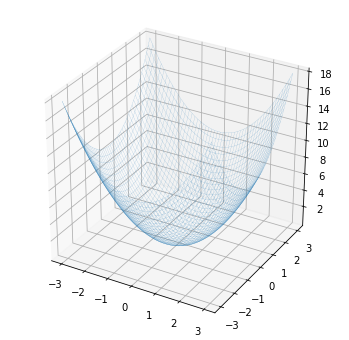

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [0] * 2
t = np.linspace(-3, 3)
x[0] = t
x[1] = t
X = np.meshgrid(x[0], x[1])

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection' : '3d'})
ax.plot_wireframe(X[0], X[1], function_2(X), linewidth=0.1)
plt.show()


このように複数の関数からなる関数の微分を**偏微分**という。

また、すべての変数の偏微分をベクトルにしてまとめたものを**勾配**という。

#勾配
以下は実装

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) #xと同じ形状の配列を作成
    
    for idx in range(x, size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    
    return grad

#勾配法
勾配の方向は必ずその関数の最小値を指すとは限らないが、少なくともその地点では最も値を少なくすることができる方向である。そこで用いられるのが勾配法である。勾配法では、現在の場所から勾配方向に一定の距離進み、その先でも勾配を求めてまたその手順を繰り返す。勾配法は機械学習の最適化問題でよく用いられ、特にニューラルネットワークにおいてよく用いられる。

$x_{0}=x_{0}-\eta  \frac{∂f}{∂x_{0}}$

$x_{1}=x_{1}-\eta  \frac{∂f}{∂x_{1}}$

この式の$∂$は更新の量を表す。ニューラルネットワークの学習においては、学習率と呼ばれ、1回の学習でどれだけ学習しパラメーターを更新するかを定める値である。勾配降下法（最小値を目指す勾配法）は以下のように実装される。



In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

この時、学習率は大きすぎても小さすぎてもいけない。

#学習アルゴリズムの実装
ニューラルネットワークの学習は4つのステップに分けられる。

1,ミニバッチ

訓練データからランダムに一部のデータを抜き出す。

2,勾配の算出

ミニバッチの損失関数を減らすために各重みパラメータの勾配を求める。

3.パラメータの更新

重みパラメーターを勾配方向に微小量だけ更新する。

4.繰り返す

上記の手順を繰り返す。

この方法は**勾配降下法**と呼ばれ、特にミニバッチによって無作為に選ばれたデータを使用していることから、**確率的勾配降下法**と呼ばれる。多くのディープラーニングのフレームワークでは、頭文字をとって**SGD**という名前の関数で実装されるのが一般的。o

#本章で学んだこと

- 機械学習で使用するデータセットは訓練データとテストデータに分けられる。
- 訓練データで学習を行い、学習したモデルの汎化能力をテストデータで評価する。
- ニューラルネットワークの学習は、損失関数を指標として、損失関数の値が小さくなるように重みパラメータを更新する。
-更新の際は、重みパラメータの勾配を利用して勾配方向に重みの値を更新するさぎょうを繰り返す。
-微笑な値を与えたときの差分によって微分を求めることを数値微分という。これは重みパラメータの勾配を求めることができる。
-数値微分による計算には時間がかかるが、その実装は簡単である。一方、次章で学ぶやや複雑な誤差逆伝播法は、高速に勾配を求めることができる。